In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.shape

(614, 13)

In [7]:
col=list(data.columns)
for i in col:
  if data[i].dtype=='object':
    data[i]=data[i].fillna(data[i].mode()[0])
  else:
    data[i]=data[i].fillna(data[i].mean())

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [10]:
new_data=data.replace({'Gender':{"Male":0,"Female":1},'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{"Yes":1,'No':0},'Property_Area':{'Urban':0,'Rural':1,'Semiurban':2},'Loan_Status':{'Y':1,"N":0}})

#EDA 

<function matplotlib.pyplot.show(*args, **kw)>

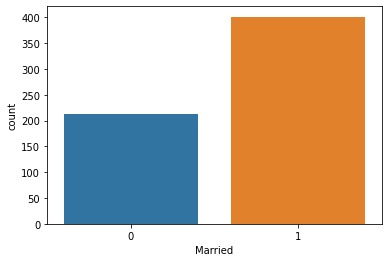

In [11]:
sns.countplot(data=new_data,x="Married")
plt.show

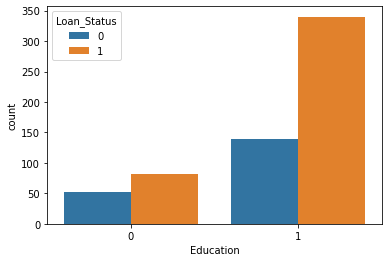

In [12]:
sns.countplot(x='Education',hue='Loan_Status',data=new_data)

In [13]:
new_data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

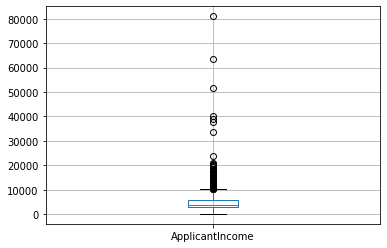

In [14]:
new_data.boxplot('ApplicantIncome')

In [15]:
new_data.corr()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,0.045364,0.000525,-0.058809,-0.082912,-0.107930,0.073567,-0.012819,0.082045,-0.017987
Married,-0.364569,1.000000,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.003071,0.091478
Education,0.045364,-0.012304,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.077936,0.003592,0.085884
Self_Employed,0.000525,0.004489,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,0.021996,-0.003700
ApplicantIncome,-0.058809,0.051708,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.007894,-0.004710
CoapplicantIncome,-0.082912,0.075948,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,-0.028356,-0.059187
LoanAmount,-0.107930,0.147141,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,0.013799,-0.036416
Loan_Amount_Term,0.073567,-0.100863,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,0.089508,-0.020974
Credit_History,-0.012819,0.005852,0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.036190,0.540483
Property_Area,0.082045,0.003071,0.003592,0.021996,-0.007894,-0.028356,0.013799,0.089508,0.036190,1.000000,0.103253


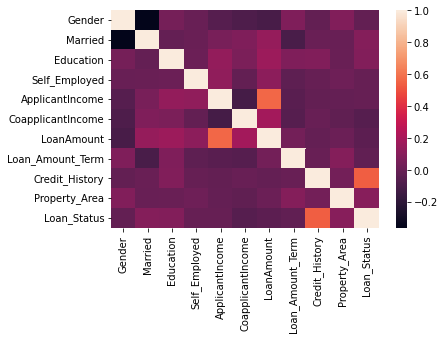

In [16]:
sns.heatmap(new_data.corr())

In [17]:
new_data=new_data.replace(to_replace='3+',value=4)

In [18]:
new_data["Dependents"].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [19]:
X=new_data.drop(columns=["Loan_ID","Loan_Status"],axis=1)

In [20]:
y=new_data["Loan_Status"]

In [21]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1
610,0,1,4,1,0,4106,0.0,40.000000,180.0,1.0,1
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0


In [22]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_sc,y_train)
y_pred=rfc.predict(X_test_sc)

In [28]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
from sklearn.metrics import accuracy_score


In [30]:
accuracy_score(y_pred,y_test)

0.7642276422764228

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
KNeighborsClassifier()

KNeighborsClassifier()

In [33]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
y_pred1=model1.predict(X_test)

In [35]:
accuracy_score(y_pred1,y_test)

0.5853658536585366

In [36]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train_sc, y_train)

GaussianNB()

In [37]:
y_pred2=model2.predict(X_test)

In [38]:
accuracy_score(y_pred2,y_test)

0.34959349593495936

#Form the above 3 model we can random forest has given the best accuracy when compare to KNN and Naive bey model